In [2]:
#!pip install mlxtend 

In [3]:
import pandas as pd
import numpy as np

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [128]:
trans_part1 = pd.read_csv("order_products__part1.csv")
trans_part2  = pd.read_csv("order_products__part2.csv")
order_df = pd.read_csv("orders.csv")
product_df = pd.read_csv("products.csv")

In [129]:
final_df = trans_part2.append(trans_part1,ignore_index=True)
final_df.shape

(33819106, 4)

In [10]:
#Number of customer the store have

#percent of customer placing more than 80 orders
#top 20 producabsts
#which day of the week store has less rush
len(order_df.user_id.unique())

206209

In [11]:
order_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


# percent of customer placing more than 80 orders

In [12]:
od = order_df.groupby("user_id")["order_id"].size().reset_index()

In [13]:
od.head()

,user_id,order_id
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


In [14]:
len(od[od.order_id>80])/len(od)*100

1.3719090825327702

# which day of the week store has less rush

In [28]:
order_df.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [30]:
order_df.groupby("order_dow")["order_hour_of_day"].sum().sort_values()

order_dow
4    5791935
3    5908978
5    6057068
6    6072205
2    6292948
1    7740647
0    8156680
Name: order_hour_of_day, dtype: int64

In [31]:
#thursday has less rush

# --------------------

In [32]:
order_df.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [33]:
trans_part2.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [34]:
product_df.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


# Top 20 products

In [35]:
new_prod = pd.merge(trans_part2[["product_id","add_to_cart_order"]],
                    product_df[["product_id","product_name"]])
new_prod.head()

,product_id,add_to_cart_order,product_name
0,33120,1,Organic Egg Whites
1,33120,5,Organic Egg Whites
2,33120,13,Organic Egg Whites
3,33120,5,Organic Egg Whites
4,33120,28,Organic Egg Whites


In [37]:
top_20 = new_prod.groupby(["product_id","product_name"])["add_to_cart_order"].sum().reset_index()
top_20.head()

,product_id,product_name,add_to_cart_order
0,1,Chocolate Sandwich Cookies,11271
1,2,All-Seasons Salt,953
2,3,Robust Golden Unsweetened Oolong Tea,1804
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,3325
4,5,Green Chile Anytime Sauce,102


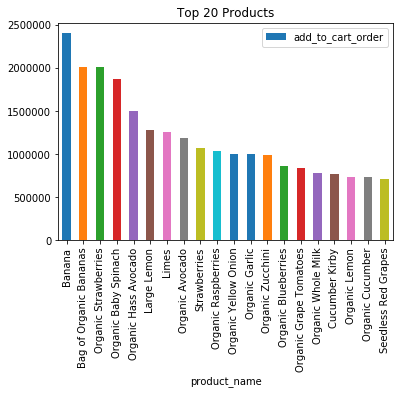

In [43]:
top_20.sort_values(by="add_to_cart_order",ascending=False).head(20).plot(kind="bar",
                                                                        x="product_name",
                                                                        y="add_to_cart_order",title="Top 20 Products")

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#which is more popular for organic strawberries or straberries
#how likely is it to purchase banana if someone purchase strawberries
#how strong is association between organic rasberries and organic straberries

In [8]:
trans_part2.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [9]:
product_df.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


In [17]:
#find out product is of 
product_df[(product_df.product_name=="Organic Strawberries") | (product_df.product_name=="Strawberries")]

,product_id,product_name,aisle_id,department_id
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4


In [25]:
#no of organic strawberries
len(trans_part2[trans_part2.product_id==21137])

264683

In [61]:
#total no of order
len(trans_part2.order_id.unique())

3346083

In [27]:
#support of organic strawberries
264683/3214874

0.08233075386469267

In [28]:
len(trans_part2[trans_part2.product_id==16797])

142951

In [29]:
#support for strawberries
142951/3214874

0.04446550626867492

### how likely is it to purchase banana if someone purchase strawberries

In [30]:
#confidence

In [32]:
product_df[(product_df.product_name=="Banana") | (product_df.product_name=="Strawberries")]

,product_id,product_name,aisle_id,department_id
16796,16797,Strawberries,24,4
24851,24852,Banana,24,4


In [60]:
#banana
len(trans_part2[trans_part2.product_id==24852])

491291

In [34]:
#straberries
len(trans_part2[trans_part2.product_id==16797])

142951

In [53]:
ban = trans_part2[trans_part2.product_id==24852]
ban.head()

,order_id,product_id,add_to_cart_order,reordered
77,10,24852,1,1
180,20,24852,6,0
190,22,24852,3,1
234,26,24852,2,1
414,52,24852,2,1


In [67]:
st = trans_part2[trans_part2.product_id==16797]
st.head()

,order_id,product_id,add_to_cart_order,reordered
380,47,16797,1,1
663,78,16797,5,0
696,82,16797,7,0
721,85,16797,1,1
738,87,16797,1,1


In [68]:
len(st)

149445

In [55]:
st_ban = pd.merge(ban,st,left_on="order_id",right_on="order_id",how="inner")
st_ban.head()

,order_id,product_id_x,add_to_cart_order_x,reordered_x,product_id_y,add_to_cart_order_y,reordered_y
0,184,24852,2,1,16797,6,1
1,187,24852,1,1,16797,8,1
2,258,24852,1,1,16797,6,1
3,338,24852,1,1,16797,21,1
4,367,24852,2,1,16797,17,0


In [56]:
#total banana and strawberries appeared
len(st_ban)

43180

In [63]:
(43180/3346083),(142951/3346083)

(0.012904641038491873, 0.04272189303134441)

In [69]:
#confidence
len(st_ban)/len(st)

0.28893572886346147

### how strong is association between organic rasberries and organic straberries

# Association rules -5 step process

In [130]:
#finding top 20
product_count = final_df.groupby("product_id").size().reset_index()
product_count = product_count.rename(columns={0:"Freq"})
product_count.head()


,product_id,Freq
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16


In [131]:
#finding top 20 products
top_20_prod = product_count.sort_values(by="Freq",ascending=False).head(20)
top_20_prod.head()

,product_id,Freq
24849,24852,491291
13173,13176,394930
21134,21137,275577
21900,21903,251705
47205,47209,220877


In [132]:
top_20_prod_name = pd.merge(top_20_prod,product_df,on="product_id",how="left")
top_20_prod_name.head()

,product_id,Freq,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4


In [133]:
final_top_20_prod_name = top_20_prod_name[["product_id","product_name"]]
final_top_20_prod_name.head()

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado


In [137]:
#list of what we need to filter out
productId = final_top_20_prod_name[["product_id"]]
productId.shape

(20, 1)

In [142]:
#filtering trans data

df = final_df[0:0]

for i in range(0,20):
    pId = productId.iloc[i]["product_id"]
    stDf = final_df[final_df["product_id"] == pId]
    df = df.append(stDf,ignore_index=True)

In [143]:
df.head()

,order_id,product_id,add_to_cart_order,reordered
0,10,24852,1,1
1,20,24852,6,0
2,22,24852,3,1
3,26,24852,2,1
4,52,24852,2,1


In [144]:
with_prod = pd.merge(df,final_top_20_prod_name,left_on="product_id",right_on="product_id",
                    how="left")
with_prod.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,10,24852,1,1,Banana
1,20,24852,6,0,Banana
2,22,24852,3,1,Banana
3,26,24852,2,1,Banana
4,52,24852,2,1,Banana


In [145]:
basket = with_prod.groupby(["order_id","product_name"]).size().reset_index()
basket.head()

,order_id,product_name,0
0,1,Bag of Organic Bananas,1
1,1,Cucumber Kirby,1
2,1,Organic Hass Avocado,1
3,3,Organic Baby Spinach,1
4,5,Bag of Organic Bananas,1


In [146]:
basket_matrix  = basket.pivot("order_id","product_name",0)
basket_matrix.head()

product_name,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Cucumber Kirby,Large Lemon,Limes,Organic Avocado,Organic Baby Spinach,Organic Blueberries,Organic Fuji Apple,Organic Garlic,Organic Grape Tomatoes,Organic Hass Avocado,Organic Lemon,Organic Raspberries,Organic Strawberries,Organic Whole Milk,Organic Yellow Onion,Organic Zucchini,Strawberries
order_id,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [147]:
final_basket = basket_matrix.fillna(0)
final_basket.head()

product_name,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Cucumber Kirby,Large Lemon,Limes,Organic Avocado,Organic Baby Spinach,Organic Blueberries,Organic Fuji Apple,Organic Garlic,Organic Grape Tomatoes,Organic Hass Avocado,Organic Lemon,Organic Raspberries,Organic Strawberries,Organic Whole Milk,Organic Yellow Onion,Organic Zucchini,Strawberries
order_id,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [149]:
freq_itemset = apriori(final_basket,min_support=0.01,use_colnames=True)
freq_itemset.head()

,support,itemsets
0,0.048437,(Apple Honeycrisp Organic)
1,0.219193,(Bag of Organic Bananas)
2,0.272675,(Banana)
3,0.055351,(Cucumber Kirby)
4,0.089242,(Large Lemon)


In [150]:
rules = association_rules(freq_itemset,metric="lift",min_threshold=1.05)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apple Honeycrisp Organic),(Bag of Organic Bananas),0.048437,0.219193,0.013533,0.279391,1.274634,0.002916,1.083537
1,(Bag of Organic Bananas),(Apple Honeycrisp Organic),0.219193,0.048437,0.013533,0.061740,1.274634,0.002916,1.014178
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.122591,0.219193,0.035943,0.293199,1.337631,0.009072,1.104706
3,(Bag of Organic Bananas),(Organic Hass Avocado),0.219193,0.122591,0.035943,0.163981,1.337631,0.009072,1.049509
4,(Organic Lemon),(Bag of Organic Bananas),0.050646,0.219193,0.013015,0.256983,1.172407,0.001914,1.050861


In [153]:
len(rules)

58

In [152]:
rules.sort_values(by="lift",ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,(Organic Garlic),(Organic Yellow Onion),0.063236,0.065334,0.012723,0.201192,3.079416,0.008591,1.170075
45,(Organic Yellow Onion),(Organic Garlic),0.065334,0.063236,0.012723,0.194731,3.079416,0.008591,1.163293
18,(Limes),(Large Lemon),0.081399,0.089242,0.016094,0.197723,2.215569,0.008830,1.135215
19,(Large Lemon),(Limes),0.089242,0.081399,0.016094,0.180345,2.215569,0.008830,1.120717
46,(Organic Hass Avocado),(Organic Lemon),0.122591,0.050646,0.012225,0.099725,1.969067,0.006017,1.054516
47,(Organic Lemon),(Organic Hass Avocado),0.050646,0.122591,0.012225,0.241389,1.969067,0.006017,1.156600
54,(Organic Strawberries),(Organic Raspberries),0.152950,0.079147,0.019721,0.128940,1.629122,0.007616,1.057164
55,(Organic Raspberries),(Organic Strawberries),0.079147,0.152950,0.019721,0.249174,1.629122,0.007616,1.128158
20,(Organic Avocado),(Large Lemon),0.102248,0.089242,0.014301,0.139862,1.567219,0.005176,1.058851
21,(Large Lemon),(Organic Avocado),0.089242,0.102248,0.014301,0.160244,1.567219,0.005176,1.069064


In [139]:
list(productId)

['product_id']

In [76]:
list(product_df)

['product_id', 'product_name', 'aisle_id', 'department_id']